In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgy0IaNjRfLGLoX_HYZYjsAAf7nfHdnnyldlSg0z4rXN-vMFyTousc


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
from numpy import load

import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import build_montages

from PIL import ImageFont, ImageDraw, Image

from imutils.contours import sort_contours
import imutils

In [ ]:
features = load('/content/drive/MyDrive/Handwritten_bengali_character_recognition/Numpy_files/imagepaths.npy')
features = np.expand_dims(features, axis=-1)
labels = load('/content/drive/MyDrive/Handwritten_bengali_character_recognition/Numpy_files/labels.npy')

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(features,
	labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Handwritten_bengali_character_recognition/Model/model2')

In [ ]:
model = models.Sequential([
            layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)),
            layers.AveragePooling2D((2, 2)),

            layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
            layers.AveragePooling2D((2, 2)),

            layers.Conv2D(filters=200, kernel_size=(3, 3), activation='relu'),
            layers.AveragePooling2D((2, 2)),

            layers.Conv2D(filters=400, kernel_size=(3, 3), activation='relu'),
            layers.AveragePooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Flatten(),
            layers.Dense(400, activation='relu'),
            layers.Dense(200, activation='relu'),
            layers.Dense(100, activation='relu'),
            layers.Dense(84, activation='softmax')
])

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

history = model.fit(testX, testY, epochs = 20)

In [ ]:
model.evaluate(testX,testY)

1017/1017 [==============================] - 34s 5ms/step - loss: 0.0346 - accuracy: 0.9899


[0.034580767154693604, 0.9899154305458069]

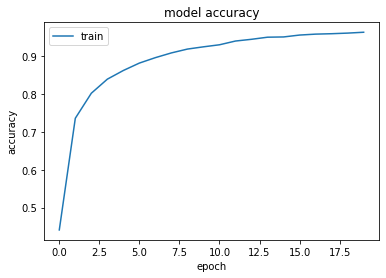

In [ ]:
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.savefig(r'/content/drive/MyDrive/Handwritten_bengali_character_recognition/Training_Graphs/accuracy.png')
plt.show()

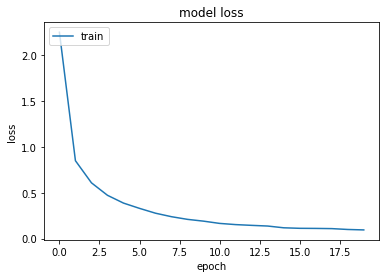

In [ ]:
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.savefig(r'/content/drive/MyDrive/Handwritten_bengali_character_recognition/Training_Graphs/loss.png')
plt.show()

In [ ]:
labelNames = ["অ","আ","ই","ঈ","উ","ঊ","ঋ","এ","ঐ","ও","ঔ","ক","খ","গ",
              "ঘ","ঙ","চ","ছ","জ","ঝ","ঞ","ট","ঠ","ড","ঢ","ণ","ত","থ",
              "দ","ধ","ন","প","ফ","ব","ভ","ম","য","র","ল","শ","ষ","স",
              "হ","ড়","ঢ়","য়","ৎ","ং","ঃ","৺","০","১","২","৩","৪","৫",
              "৬","৭","৮","৯","ক্ষ","ব্দ","ঙ্গ","স্ক","স্ফ","স্থ","চ্ছ","ক্ত","স্ন","ষ্ণ",
              "ম্প","হ্ম","প্ত","ম্ব","ন্ড","দ্ভ","ত্থ","ষ্ট","ল্প","ষ্প","ন্দ","ন্ধ","ম্ম","ন্ঠ"]

labelNames = [l for l in labelNames]

In [ ]:
predictions = model.predict(testX)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

           অ       1.00      1.00      1.00       387
           আ       1.00      1.00      1.00       387
           ই       1.00      0.99      0.99       387
           ঈ       0.99      1.00      1.00       387
           উ       0.99      0.98      0.99       387
           ঊ       1.00      1.00      1.00       388
           ঋ       1.00      0.99      0.99       387
           এ       1.00      0.99      1.00       387
           ঐ       0.99      0.99      0.99       387
           ও       1.00      0.95      0.97       388
           ঔ       0.99      0.99      0.99       387
           ক       0.98      1.00      0.99       388
           খ       0.99      0.95      0.97       388
           গ       0.99      1.00      1.00       387
           ঘ       1.00      0.99      0.99       387
           ঙ       0.99      0.99      0.99       387
           চ       0.98      1.00      0.99       387
           ছ       0.99    

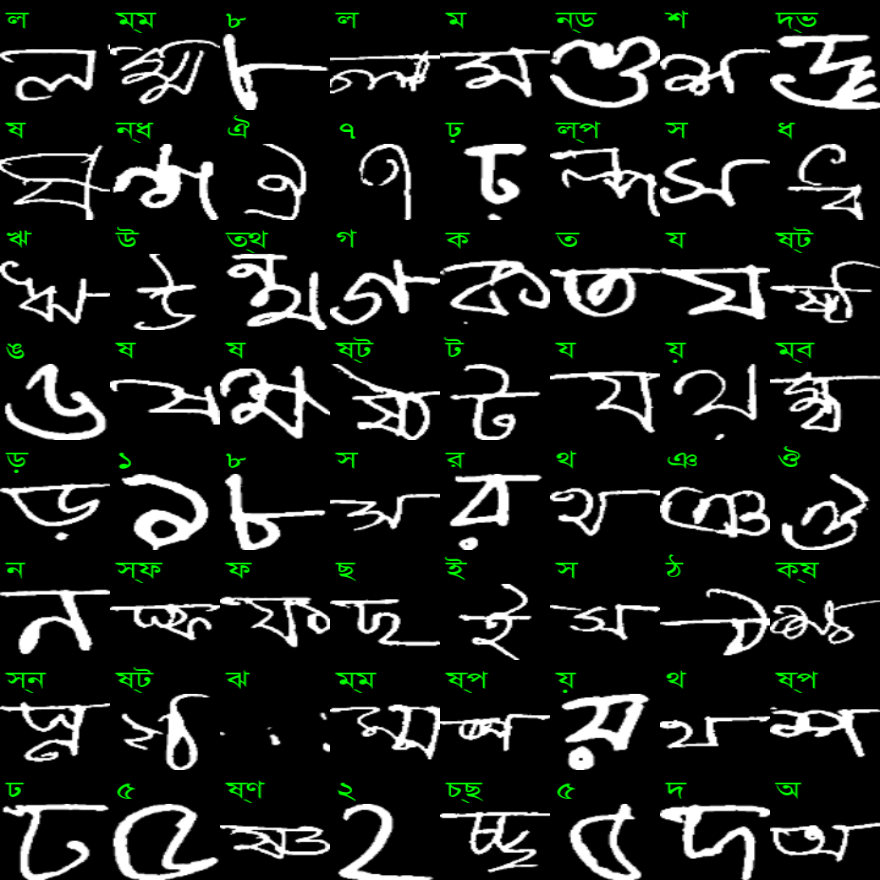

In [ ]:
images = []
blank = np.zeros(shape = [40,90,3], dtype = np.uint8)
for i in np.random.choice(np.arange(0, len(testY)), size = (64,)):

    probe = model.predict(testX[np.newaxis, i])
    prediction = probe.argmax(axis=1)
    label = labelNames[prediction[0]]

    image = (testX[i]).astype("uint8")
    color = (0,255,0)

    if prediction[0] != np.argmax(testY[i]):
        color = (0,0,255)

    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (90,90), interpolation = cv2.INTER_LINEAR)
    # cv2.putText(image, label, (5,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
    fontpath = "/content/drive/MyDrive/Handwritten_bengali_character_recognition/Font/AdorshoLipi_20-07-2007.ttf"
    font = ImageFont.truetype(fontpath, 25)
    img_pil = Image.fromarray(blank)
    draw = ImageDraw.Draw(img_pil)
    draw.text((5,5),  label, font = font, fill = color)
    img_pil = np.array(img_pil)

    image = cv2.resize(image, (90,90), interpolation = cv2.INTER_LINEAR)
    image = cv2.vconcat([img_pil, image])
    # image = np.concatenate((img_pil,image), axis = -1)

    images.append(image)
montage = build_montages(images, (110,110), (8,8))[0]
cv2_imshow(montage)

In [ ]:
# model.save('/content/drive/MyDrive/Handwritten_bengali_character_recognition/Model/model2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Handwritten_bengali_character_recognition/Model/model2/assets


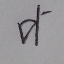

প


In [ ]:
image = cv2.imread(r'/content/drive/MyDrive/Handwritten_bengali_character_recognition/Test_samples/sample_10.jpg')
resized = cv2.resize(image,(64,64))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3 , 3), 0)
inverse= cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(resized)

# array = np.array(resized)
reshaped = np.reshape(inverse,(1,64,64,1))
# print(resized.shape)


pred = model.predict(reshaped)
pred_class = np.argmax(pred)
# print(labelNames)
pred_class =labelNames[pred_class]
print(pred_class)

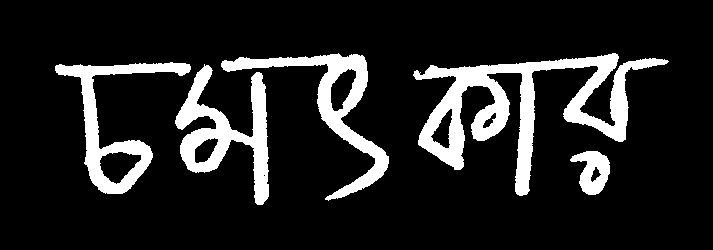

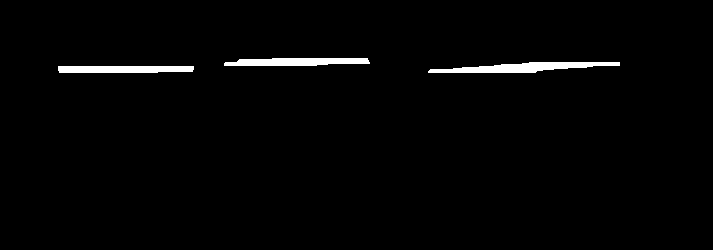

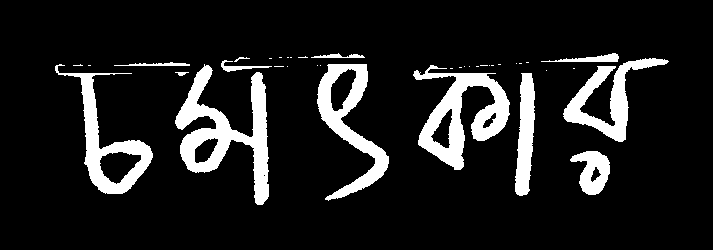

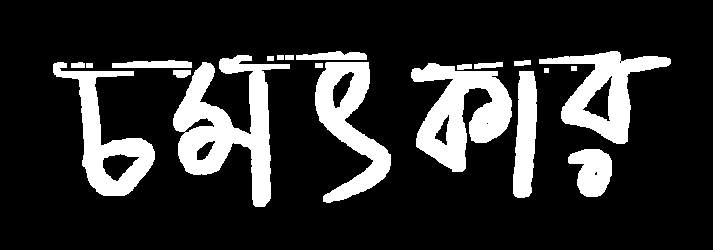

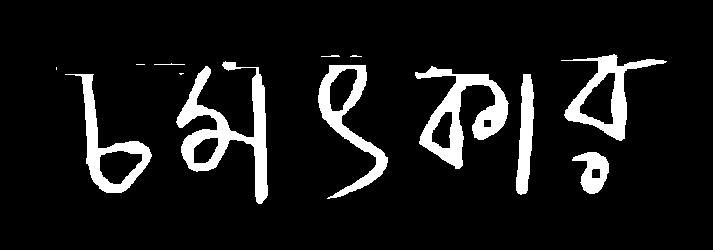

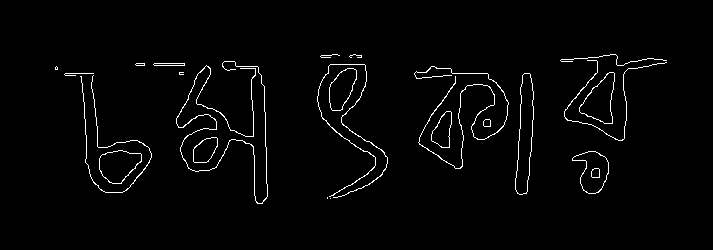

In [ ]:
image = cv2.imread(r'/content/drive/MyDrive/Handwritten_bengali_character_recognition/Test_samples/sample_29.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2_imshow(thresholded)

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30,1))
detected_lines = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, horizontal_kernel, iterations=3)
cv2_imshow(detected_lines)

cnts1 = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]
for c in cnts1:
    cv2.drawContours(thresholded, [c], -1, (0,0,0), thickness=cv2.FILLED)
cv2_imshow(thresholded)

dilated = cv2.dilate(thresholded.copy(), None, iterations=2)
cv2_imshow(dilated)

eroded = cv2.erode(dilated.copy(), None, iterations=3)
cv2_imshow(eroded)

edged = cv2.Canny(eroded, 100, 200)
cv2_imshow(edged)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# cv2.drawContours(image, cnts, -1, (0,255,0), 3)
# cv2_imshow(image)

In [ ]:
chars = []
found = 0
for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    if (w >= 50 and w <= 250) and (h >= 50 and h <= 220):
        roi = gray[y:y + h, x:x+w]
        thresh = cv2.threshold(roi, 0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
        
        if tW > tH:
            thresh = imutils.resize(thresh, width = 120)
        else:
            thresh = imutils.resize(thresh,height = 120)
        (tH,tW) = thresh.shape
        # print(tH,tW)
        dX = int(max(0, 120 - tW) / 2.0)
        dY = int(max(0, 120 - tH) / 2.0)

        padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,left=dX, right=dX, 
                                        borderType=cv2.BORDER_CONSTANT,value=(0,0,0))
        padded = cv2.resize(padded,(64,64))
        
        padded = np.expand_dims(padded, axis = -1)
        found+=1
        
        # padded = np.reshape(padded,(1,64,64,1))
        chars.append((padded, (x,y,w,h)))
        # cv2.rectangle(image, (x,y), (x+w,y+h), (200,0,0), 2)
# cv2_imshow(image)
print(f"Total characters found = {found}")


Total characters found = 5


In [ ]:

# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars])
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)
# define the list of label names
labelNames = ["অ","আ","ই","ঈ","উ","ঊ","ঋ","এ","ঐ","ও","ঔ","ক","খ","গ",
              "ঘ","ঙ","চ","ছ","জ","ঝ","ঞ","ট","ঠ","ড","ঢ","ণ","ত","থ",
              "দ","ধ","ন","প","ফ","ব","ভ","ম","য","র","ল","শ","ষ","স",
              "হ","ড়","ঢ়","য়","ৎ","ং","ঃ","৺","০","১","২","৩","৪","৫",
              "৬","৭","৮","৯","ক্ষ","ব্দ","ঙ্গ","স্ক","স্ফ","স্থ","চ্ছ","ক্ত","স্ন","ষ্ণ",
              "ম্প","হ্ম","প্ত","ম্ব","ন্ড","দ্ভ","ত্থ","ষ্ট","ল্প","ষ্প","ন্দ","ন্ধ","ম্ম","ন্ঠ"]
labelNames = [l for l in labelNames]

print(boxes)
boxes1 = [list(b) for b in boxes]
print(boxes1)

[(80, 75, 72, 118), (176, 61, 92, 143), (317, 64, 71, 134), (414, 66, 95, 103), (564, 60, 103, 81)]
[[80, 75, 72, 118], [176, 61, 92, 143], [317, 64, 71, 134], [414, 66, 95, 103], [564, 60, 103, 81]]


[INFO] চ - 99.05%
[INFO] ম - 99.81%
[INFO] ৎ - 100.00%
[INFO] ক - 100.00%
[INFO] র - 99.99%


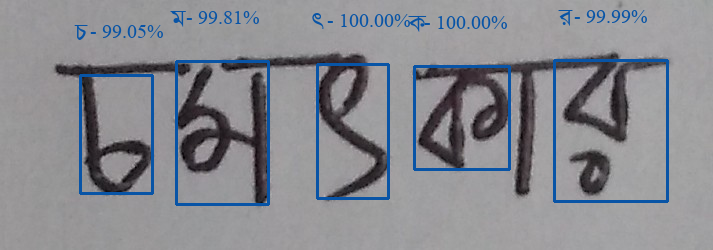

In [ ]:
fontpath = "/content/drive/MyDrive/Handwritten_bengali_character_recognition/Font/AdorshoLipi_20-07-2007.ttf"
fontpath2 = "/content/drive/MyDrive/Handwritten_bengali_character_recognition/Font/times.ttf"

font = ImageFont.truetype(fontpath, 22)
font2 = ImageFont.truetype(fontpath2, 20)
color2 = (166,84,8)
img_pil = np.array(image.copy())
flag = 0

# print(boxes)
for (pred, (x,y,w,h)) in zip(preds, boxes1):
    
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
    extra_el = ["ব", "ড", "য", "ঢ"]
    if label in extra_el:
        h1 = h + 60
        x1 = x - 10
        
        part_image = thresholded[y:y+h1,x1:x+w]
        (ttH, ttW) = part_image.shape
        
        if ttW > ttH:
            part_image = imutils.resize(part_image, width = 120)
        else:
            part_image = imutils.resize(part_image,height = 120)
        (ttH,ttW) = part_image.shape
        # print(tH,tW)
        ddX = int(max(0, 120 - ttW) / 2.0)
        ddY = int(max(0, 120 - ttH) / 2.0)

        padded = cv2.cv2.copyMakeBorder(part_image, top=ddY, bottom=ddY,left=ddX, right=ddX, 
                                        borderType=cv2.BORDER_CONSTANT,value=(0,0,0))
        padded = cv2.resize(padded,(64,64))
        

        reshaped = np.reshape(padded,(1,64,64,1))
        pred = model.predict(reshaped)
        i = np.argmax(pred)
        prob = pred[0][i]
        label =labelNames[i]
        print("[INFO] {} - {:.2f}%".format(label, prob * 100))
        cv2.rectangle(img_pil, (x1,y), (x+w, y+h1),color2, 2)
        img_pil = Image.fromarray(img_pil)
        draw = ImageDraw.Draw(img_pil)
        draw.text((x-5,y-60),  label, font = font, fill = color2)
        draw.text((x+5,y-55),  f" - {prob*100:.2f}%", font = font2, fill = color2)
        img_pil = np.array(img_pil)
                

    else:
        print("[INFO] {} - {:.2f}%".format(label, prob * 100))
        cv2.rectangle(img_pil, (x,y), (x+w, y+h),color2, 2)
        img_pil = Image.fromarray(img_pil)
        draw = ImageDraw.Draw(img_pil)
        draw.text((x-5,y-60),  label, font = font, fill = color2)
        draw.text((x+5,y-55),  f" - {prob*100:.2f}%", font = font2, fill = color2)
        img_pil = np.array(img_pil)
    flag+=1


cv2_imshow(img_pil)